In [1]:
cd ..

C:\Users\angie\Desktop\Course_Material\Phase_1\use_me\Group-4-Microsoft_Movie_Analysis


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
df_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')


# Budget Data


In [4]:
df_budgets.head(4)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"


# Data Cleaning

In [5]:
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace('$','')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace('$','')
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].str.replace('$','')
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace(',','')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace(',','')
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].str.replace(',','')

In [6]:
df_budgets['production_budget'] = df_budgets['production_budget'].astype(int)
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].astype(int)
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].astype("int64")

df_budgets['total_profit'] = df_budgets['worldwide_gross'] - df_budgets['production_budget']

In [7]:
df_budgets['year'] = pd.DatetimeIndex(df_budgets['release_date']).year
df_budgets = df_budgets.loc[df_budgets['year'] >= 2010]

In [8]:
df_budgets['ROI %'] = (df_budgets['total_profit'] / df_budgets['production_budget']) * 100

# Worth Spending the Big Buck$?

In [9]:
df_highbudget = df_budgets.loc[df_budgets['production_budget'] >= 150000000]

In [10]:
df_highbudget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,year,ROI %
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,315.369636
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,571.016739


In [11]:
df_highbudget['Box Office Success'] = np.where(df_highbudget['ROI %'] > 250, True, False)
df_highbudget['Box Office Failure'] = np.where(df_highbudget['ROI %'] < 150, True, False)
df_highbudget['Box Office Success'].value_counts()

<ipython-input-11-5e3dc9feb155>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_highbudget['Box Office Success'] = np.where(df_highbudget['ROI %'] > 250, True, False)
<ipython-input-11-5e3dc9feb155>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_highbudget['Box Office Failure'] = np.where(df_highbudget['ROI %'] < 150, True, False)


False    77
True     59
Name: Box Office Success, dtype: int64

In [12]:
df_highbudget['Box Office Success'].value_counts()

False    77
True     59
Name: Box Office Success, dtype: int64

In [13]:
df_highbudget['Box Office Failure'].value_counts()

False    86
True     50
Name: Box Office Failure, dtype: int64

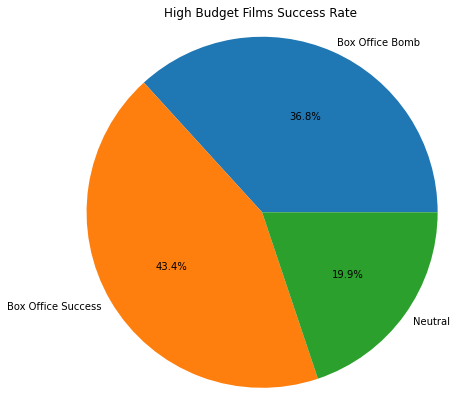

In [14]:
labels = 'Box Office Bomb', 'Box Office Success', 'Neutral'
amts = [50, 59, 27]

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(amts, labels = labels, autopct='%1.1f%%', labeldistance=1.06)
ax.axis('equal')

plt.title('High Budget Films Success Rate');

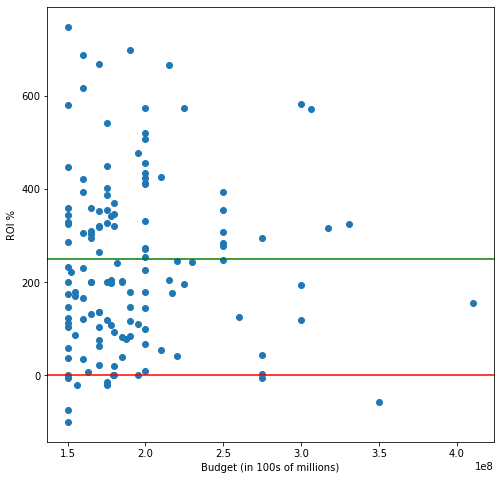

In [15]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(df_highbudget['production_budget'], df_highbudget['ROI %'] )
plt.xlabel('Budget (in 100s of millions)')
plt.ylabel('ROI %')
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=250, color='g', linestyle='-');

In [16]:
df_highbudget.loc[df_highbudget['Box Office Success'] == True].head(4)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,year,ROI %,Box Office Success,Box Office Failure
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,324.384139,True,False
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,315.369636,True,False
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,571.016739,True,False
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,582.711400,True,False


# ROI and Genre

In [18]:
highest_rois = df_budgets.loc[df_budgets['ROI %'] > 1000]


In [19]:
highest_rois.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,year,ROI %
621,22,"Jul 3, 2013",Despicable Me 2,76000000,368065385,975216835,899216835,2013,1183.180046
625,26,"Jul 8, 2016",The Secret Life of Pets,75000000,368384330,886750534,811750534,2016,1082.334045
629,30,"Jun 30, 2017",Despicable Me 3,75000000,264624300,1034727750,959727750,2017,1279.637000


In [20]:
genres_top100roi = {'Horror/Thriller': 45, 'Comedy' : 17, 'Drama/Romance' : 16, 'Musical' : 3, 'Animation' : 5, 'Sci-fi' : 5, 'Documentary' : 2, 'Sport' : 2, 'Adventure' : 1}

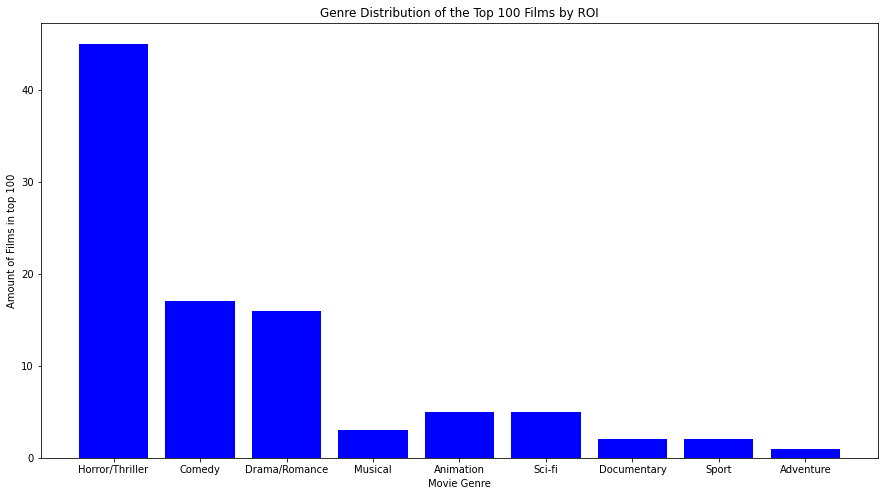

In [21]:
fig, ax = plt.subplots(figsize = (15, 8))

plt.bar(range(len(genres_top100roi)), genres_top100roi.values(), align='center', color = 'b')
plt.xticks(range(len(genres_top100roi)), list(genres_top100roi.keys()))


plt.xlabel('Movie Genre')
plt.ylabel('Amount of Films in top 100')
plt.title('Genre Distribution of the Top 100 Films by ROI')


plt.show()


In [22]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 12

In [37]:
df_hb_bos = df_highbudget.loc[df_highbudget['Box Office Success'] == True]

In [42]:
type_list = ['Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Original', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Original', 'Franchise', 'Franchise', 'Franchise', 'Original', 'Original', 'Franchise', 'Franchise', 'Original', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Original', 'Original', 'Original', 'Franchise', 'Original', 'Franchise', 'Franchise', 'Franchise', 'Original', 'Original', 'Original', 'Franchise', 'Franchise', 'Franchise', 'Original']

In [43]:
df_hb_bos['Type'] = type_list

<ipython-input-43-83ede8a812a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hb_bos['Type'] = type_list


In [45]:
subtype = ['Marvel', 'Star Wars', 'Star Wars', 'Marvel', 'DC', 'Marvel', 'LOTR', 'LOTR', 'LOTR', 'Fast and Furious', 'Marvel', 'Jurassic Park', 'Transformers', 'Marvel', 'Incredibles', 'Star Wars', 'Finding Nemo', 'Toy Story', 'Marvel', 'Marvel', 'Live Action Remake', 'James Bond', 'Monsters Inc.', 'Marvel', 'Marvel', 'Transformers', 'Fast and Furious', 'Marvel', 'Live Action Remake', 'Harry Potter', 'Mission Impossible', 'Marvel', 'Live Action Remake', 'Animated', 'Marvel', 'DC', 'Animated', 'Jurassic Park', 'Marvel', 'Marvel', 'Marvel', 'Planet of the Apes', 'Shrek', 'Marvel', 'Animated', 'Original', 'Live Action Remake', 'DC', 'Original', 'Hunger Games', 'Fast and Furious', 'DC', 'Animated', 'Animated', 'Animated', 'Marvel', 'Mission Impossible', 'Kung Fu Panda', 'Original']

In [47]:
df_hb_bos['Subtype'] = subtype

<ipython-input-47-d04fda10cd8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hb_bos['Subtype'] = subtype


Text(0.5, 1.02, 'High Budget, High ROI Films by Type')

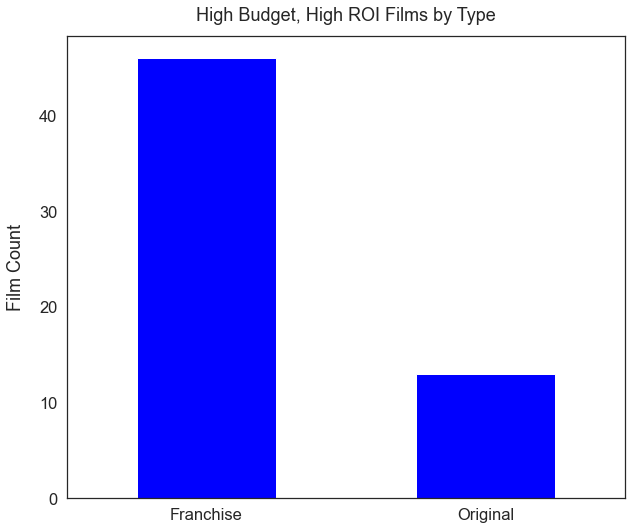

In [122]:
import seaborn as sns
sns.set_style('white')
df_hb_bos['Type'].value_counts().plot(kind = 'bar', figsize = (10, 8.5), rot = 0, color = 'blue')
plt.ylabel('Film Count', labelpad = 14)
plt.title('High Budget, High ROI Films by Type', y = 1.02)

In [100]:
franchise_only = df_hb_bos[df_hb_bos['Type'] == 'Franchise']

Text(0.5, 1.02, 'High Budget, High ROI Films Franchise Breakdown')

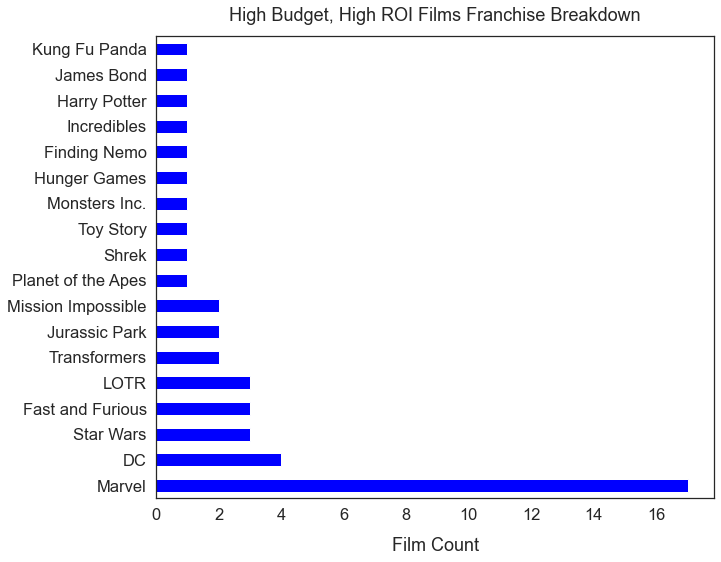

In [121]:
sns.set(font_scale = 1.5)
sns.set_style('white')
franchise_only['Subtype'].value_counts().plot(kind = 'barh', figsize = (10, 8.5), rot = 0, color = 'blue')
plt.xlabel('Film Count', labelpad = 14)
plt.title('High Budget, High ROI Films Franchise Breakdown', y = 1.02)